In [ ]:
import pandas as pd
import requests
import zipfile
from io import BytesIO

# Specify the URL of the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

# Download the ZIP file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))
#hello thisa is to form you

# Extract the ZIP file to a local directory
zip_file.extractall("data")

# Load the desired CSV file (e.g., "student-mat.csv")
file_path = "data/student-mat.csv"
data = pd.read_csv(file_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data)

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)


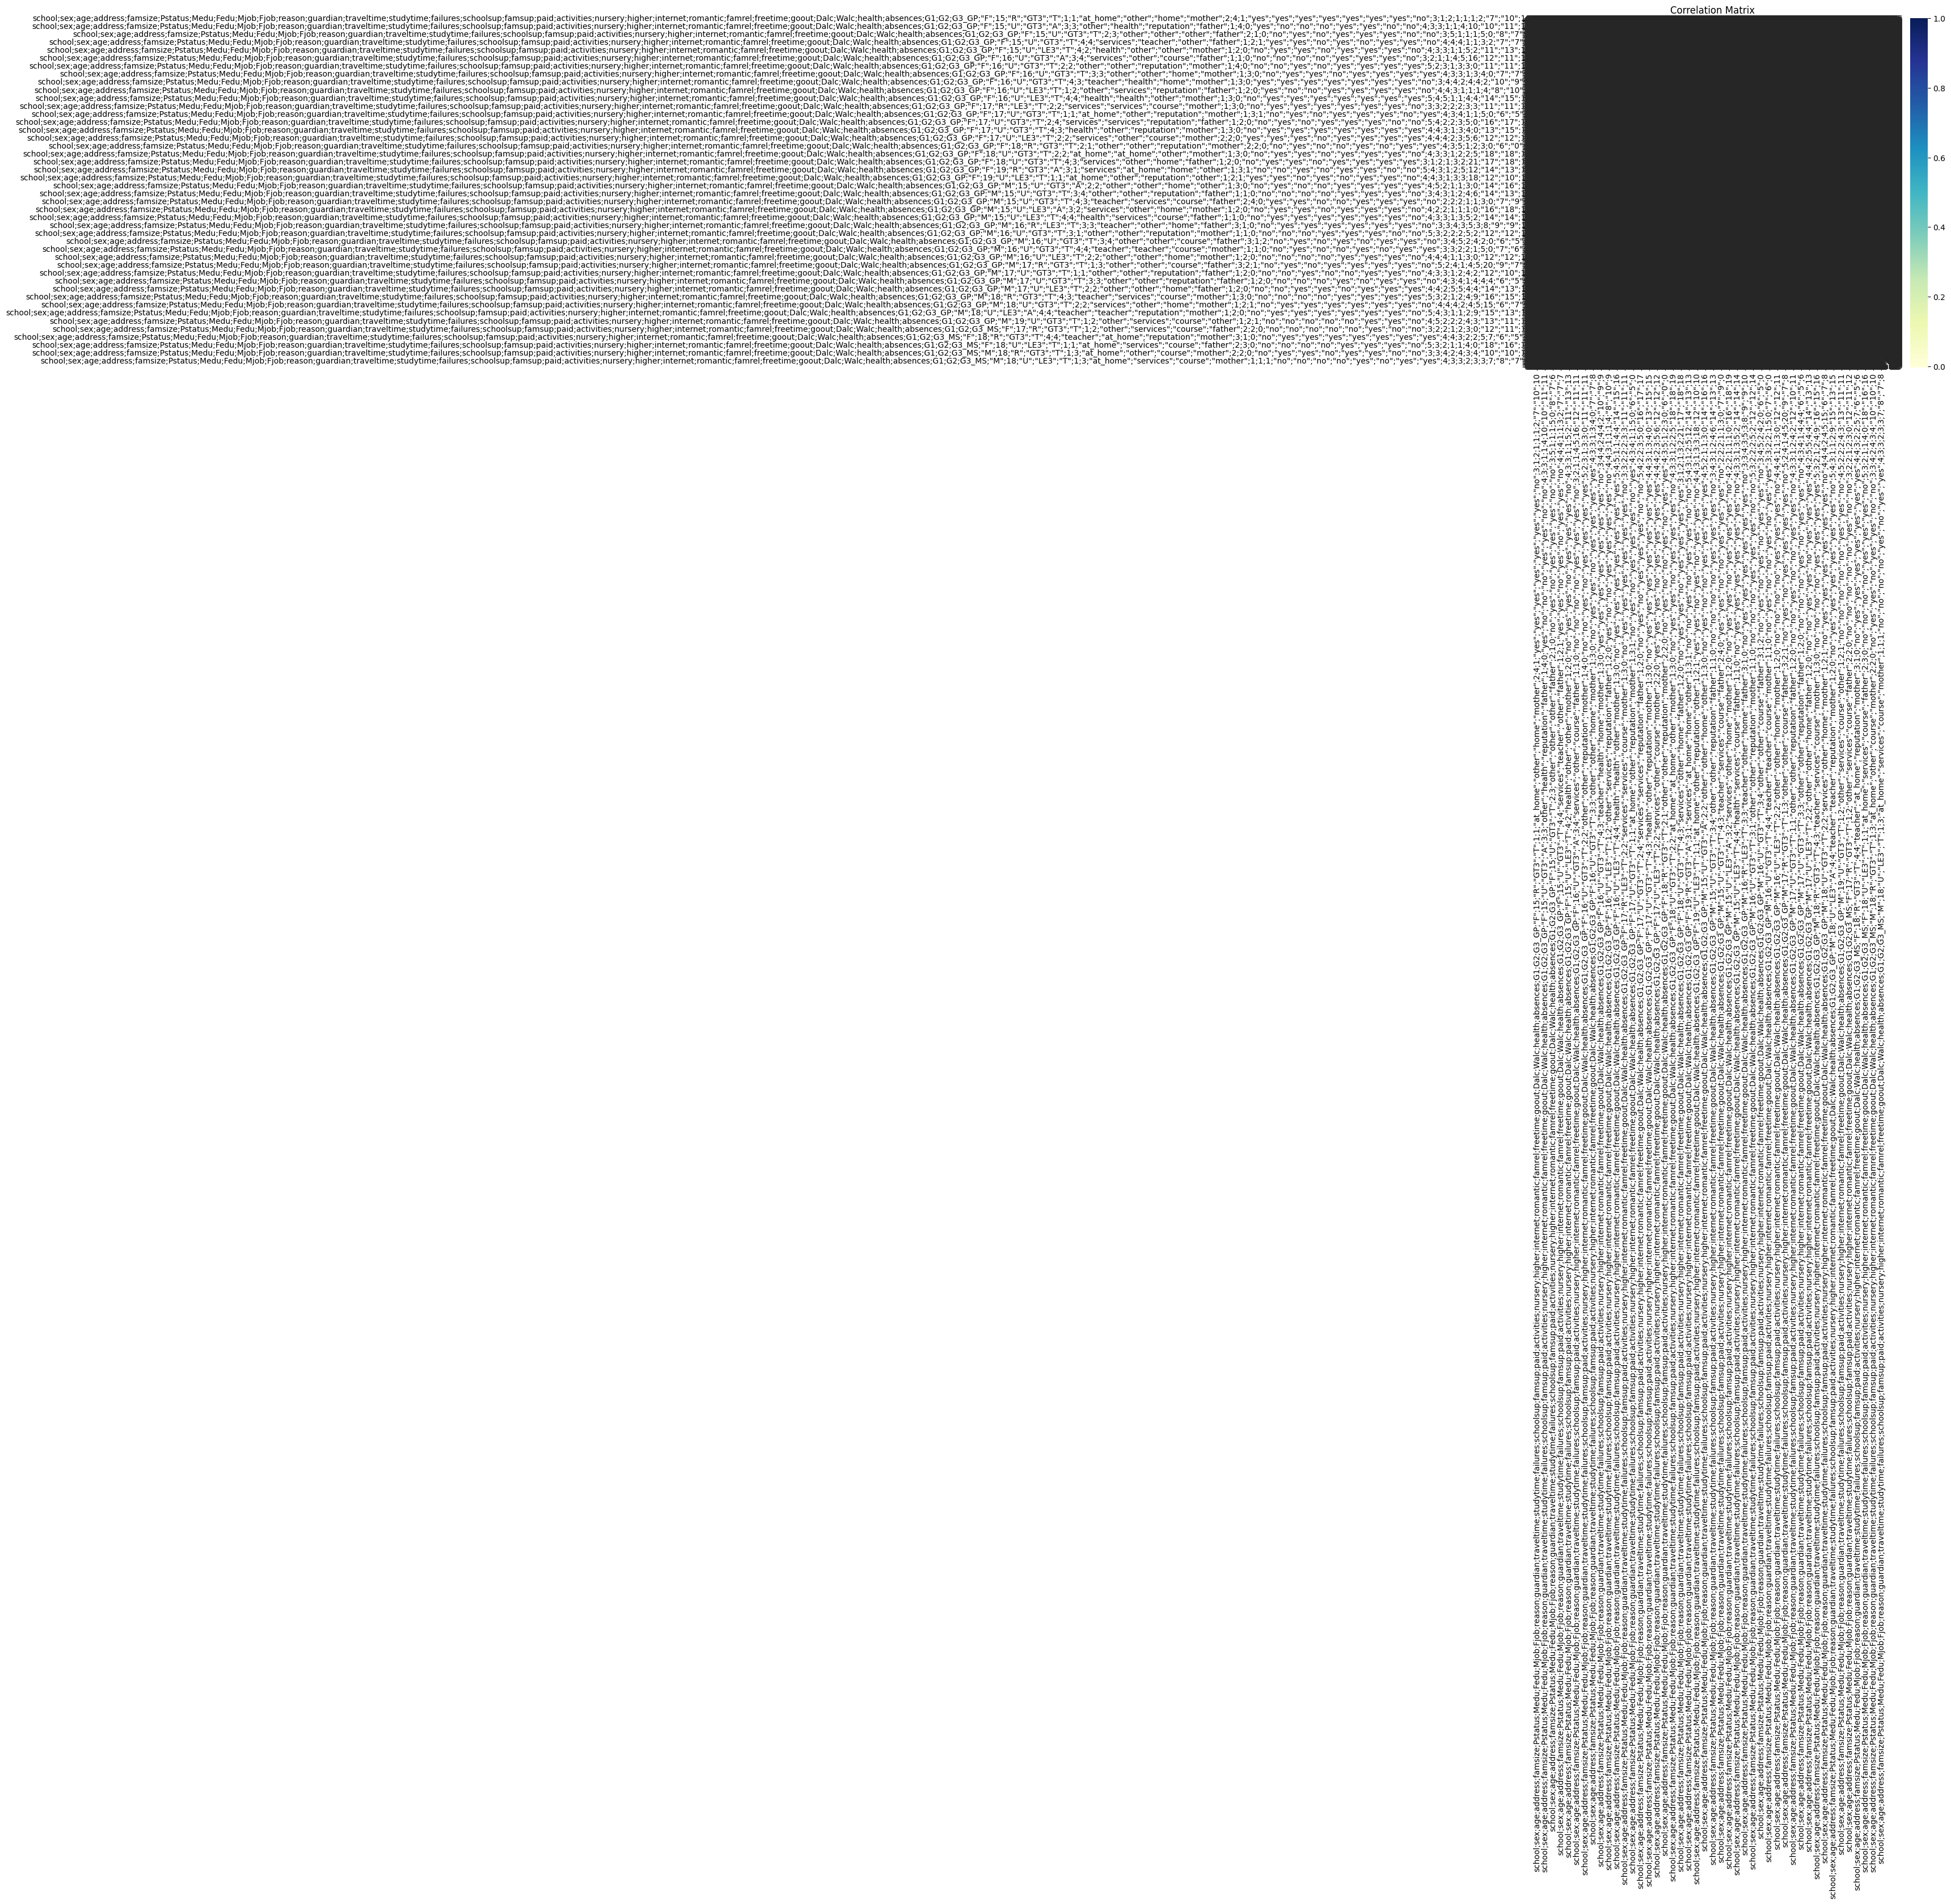

In [ ]:
# Perform correlation analysis
correlation_matrix = data_scaled.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
# Read the CSV files
d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")
# Merge the dataframes
d3 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
# Write the merged dataframe to a CSV file
d3.to_csv("merged_students.csv", index=False)

In [ ]:
df = pd.read_csv("merged_students.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#drop all the null values in the table
df.dropna()
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')


In [ ]:
binary_map = {
    "F": 0,  # Female
    "M": 1,  # Male
    "U": 0,  # Urban
    "R": 1,  # Rural
    "LE3": 0,  # Less or equal to 3
    "GT3": 1,  # Greater than 3
    "T": 0,  # Living together
    "A": 1,  # Apart
    "yes": 1,
    "no": 0
}

# Specify the correct column names for encoding
columns_to_encode = [
    'sex', 'address', 'famsize', 'Pstatus', 'schoolsup_x', 'famsup_x', 'paid_x',
    'activities_x', 'nursery', 'higher_x', 'internet', 'romantic_x',]
df[columns_to_encode] = df[columns_to_encode].apply(lambda x: x.map(binary_map))
print(df)


    school  sex  age  address  famsize  Pstatus  Medu  Fedu      Mjob  \
0       GP    0   18        0        1        1     4     4   at_home   
1       GP    0   17        0        1        0     1     1   at_home   
2       GP    0   15        0        0        0     1     1   at_home   
3       GP    0   15        0        1        0     4     2    health   
4       GP    0   16        0        1        0     3     3     other   
..     ...  ...  ...      ...      ...      ...   ...   ...       ...   
377     MS    0   18        0        0        0     3     1   teacher   
378     MS    0   18        0        1        0     1     1     other   
379     MS    0   18        0        1        0     1     1     other   
380     MS    1   17        0        0        0     3     1  services   
381     MS    1   18        1        0        0     3     2  services   

         Fjob  ... famrel_y freetime_y  goout_y  Dalc_y  Walc_y  health_y  \
0     teacher  ...        4          3        

In [ ]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,0,18,0,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,0,17,0,1,0,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


In [ ]:
columns_to_check = ['Mjob', 'Fjob', 'reason', 'guardian_x']

for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'Mjob': ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in 'Fjob': ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in 'reason': ['course' 'other' 'home' 'reputation']
Unique values in 'guardian_x': ['mother' 'father' 'other']


In [ ]:
mjob_map = {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
fjob_map = {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
reason_map = {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian_map = {'mother': 0, 'father': 1, 'other': 2}
df['Mjob'] = df['Mjob'].map(mjob_map)
df['Fjob'] = df['Fjob'].map(fjob_map)
df['reason'] = df['reason'].map(reason_map)
df['guardian_x'] = df['guardian_x'].map(guardian_map)
df['guardian_y'] = df['guardian_y'].map(guardian_map)
# Print the encoded DataFrame
print(df)

    school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       GP    0   18        0        1        1     4     4     0     4  ...   
1       GP    0   17        0        1        0     1     1     0     2  ...   
2       GP    0   15        0        0        0     1     1     0     2  ...   
3       GP    0   15        0        1        0     4     2     1     3  ...   
4       GP    0   16        0        1        0     3     3     2     2  ...   
..     ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
377     MS    0   18        0        0        0     3     1     4     3  ...   
378     MS    0   18        0        1        0     1     1     2     2  ...   
379     MS    0   18        0        1        0     1     1     2     2  ...   
380     MS    1   17        0        0        0     3     1     3     3  ...   
381     MS    1   18        1        0        0     3     2     3     2  ...   

     famrel_y  freetime_y  goout_y  Dal

In [ ]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,0,18,0,1,1,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,GP,0,17,0,1,0,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11


In [ ]:
df = df.drop('school', axis=1)
print(df)

     sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  ...  \
0      0   18        0        1        1     4     4     0     4       0  ...   
1      0   17        0        1        0     1     1     0     2       0  ...   
2      0   15        0        0        0     1     1     0     2       1  ...   
3      0   15        0        1        0     4     2     1     3       2  ...   
4      0   16        0        1        0     3     3     2     2       2  ...   
..   ...  ...      ...      ...      ...   ...   ...   ...   ...     ...  ...   
377    0   18        0        0        0     3     1     4     3       0  ...   
378    0   18        0        1        0     1     1     2     2       0  ...   
379    0   18        0        1        0     1     1     2     2       0  ...   
380    1   17        0        0        0     3     1     3     3       0  ...   
381    1   18        1        0        0     3     2     3     2       0  ...   

     famrel_y  freetime_y  

In [ ]:
non_numerical_columns = df.select_dtypes(exclude=['number']).columns
df = df.drop(columns=non_numerical_columns)

In [ ]:
file_path = 'sit_cleaned_data.csv'
df.to_csv(file_path, index=False)
print(f"DataFrame has been successfully exported to '{file_path}'")

DataFrame has been successfully exported to 'sit_cleaned_data.csv'
